In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

In [2]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(clinical_trial_df,mouse_drug_df, on='Mouse ID')

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_volume_mean = combined_data.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()
# Convert to DataFrame
tumor_volume_mean_df = pd.DataFrame(tumor_volume_mean)
tumor_volume_mean_df.reset_index(inplace=True)
# Preview DataFrame
tumor_volume_mean_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_volume_se = combined_data.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem()
# Convert to DataFrame
tumor_volume_se_df = pd.DataFrame(tumor_volume_se)
tumor_volume_se_df.reset_index(inplace=True)
# Preview DataFrame
tumor_volume_se_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
tumor_mean_pivot = tumor_volume_mean_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
tumor_se_pivot = tumor_volume_se_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
# Preview that Reformatting worked
tumor_se_pivot.head()
tumor_mean_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


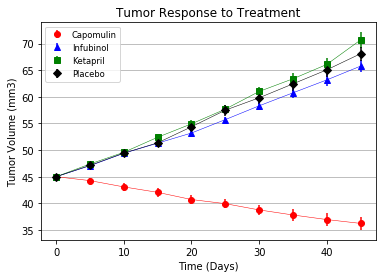

In [6]:
# Generate the Plot (with Error Bars)
fig, response = plt.subplots()

response.plot(tumor_mean_pivot.index,tumor_mean_pivot['Capomulin'],linewidth=0.5,color="red")
response.errorbar(tumor_mean_pivot.index, tumor_mean_pivot['Capomulin'], yerr=tumor_se_pivot['Capomulin'], fmt="o", color="red",
            alpha=1, label="Capomulin")

response.plot(tumor_mean_pivot.index,tumor_mean_pivot['Infubinol'],linewidth=0.5,color='b')
response.errorbar(tumor_mean_pivot.index, tumor_mean_pivot['Infubinol'], yerr=tumor_se_pivot['Infubinol'], fmt="^", color="b",
            alpha=1, label="Infubinol")

response.plot(tumor_mean_pivot.index,tumor_mean_pivot['Ketapril'],linewidth=0.5,color='green')
response.errorbar(tumor_mean_pivot.index, tumor_mean_pivot['Ketapril'], yerr=tumor_se_pivot['Ketapril'], fmt="s", color="green",
            alpha=1, label="Ketapril")

response.plot(tumor_mean_pivot.index,tumor_mean_pivot['Placebo'],linewidth=0.5,color='black')
response.errorbar(tumor_mean_pivot.index, tumor_mean_pivot['Placebo'], yerr=tumor_se_pivot['Placebo'], fmt="D", color="black",
            alpha=1, label="Placebo")

response.set_xlabel("Time (Days)")
response.set_ylabel("Tumor Volume (mm3)")
response.legend(loc="best", fontsize="small", fancybox=True)
response.set_title('Tumor Response to Treatment')
response.yaxis.grid(True)
# # Save the Figure
plt.savefig("../Images/TumorResponse.png")


In [7]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_sites_mean = combined_data.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean()
# Convert to DataFrame
met_sites_mean_df = pd.DataFrame(met_sites_mean)
met_sites_mean_df.reset_index(inplace=True)
# Preview DataFrame
met_sites_mean_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_sites_se = combined_data.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem()
# Convert to DataFrame
met_sites_se_df = pd.DataFrame(met_sites_se)
met_sites_se_df.reset_index(inplace=True)
# Preview DataFrame
met_sites_se_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [10]:
# Minor Data Munging to Re-Format the Data Frames
met_mean_pivot = met_sites_mean_df.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')
met_se_pivot = met_sites_se_df.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')
# Preview that Reformatting worked
met_mean_pivot.head()
met_se_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


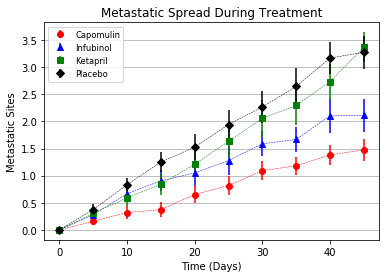

In [11]:
# Generate the Plot (with Error Bars)
fig, met = plt.subplots()

met.plot(met_mean_pivot.index,met_mean_pivot['Capomulin'],linestyle="--",linewidth=0.5,color="red")
met.errorbar(met_mean_pivot.index, met_mean_pivot['Capomulin'], yerr=met_se_pivot['Capomulin'], fmt="o", color="red",
            alpha=1, label="Capomulin")

met.plot(met_mean_pivot.index,met_mean_pivot['Infubinol'],linestyle="--",linewidth=0.5,color='b')
met.errorbar(met_mean_pivot.index, met_mean_pivot['Infubinol'], yerr=met_se_pivot['Infubinol'], fmt="^", color="b",
            alpha=1, label="Infubinol")

met.plot(met_mean_pivot.index,met_mean_pivot['Ketapril'],linestyle="--",linewidth=0.5,color='green')
met.errorbar(met_mean_pivot.index, met_mean_pivot['Ketapril'], yerr=met_se_pivot['Ketapril'], fmt="s", color="green",
            alpha=1, label="Ketapril")

met.plot(met_mean_pivot.index,met_mean_pivot['Placebo'],linestyle="--",linewidth=0.5,color='black')
met.errorbar(met_mean_pivot.index, met_mean_pivot['Placebo'], yerr=met_se_pivot['Placebo'], fmt="D", color="black",
            alpha=1, label="Placebo")

met.set_xlabel("Time (Days)")
met.set_ylabel("Metastatic Sites")
met.legend(loc="best", fontsize="small", fancybox=True)
met.set_title('Metastatic Spread During Treatment')
met.yaxis.grid(True)
# Save the Figure
plt.savefig("../Images/MetastaticSpread.png")
# Show the Figure
plt.show()

## Survival Rates

In [12]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = combined_data.groupby(['Drug','Timepoint'])['Mouse ID'].count()
# Convert to DataFrame
mice_count_df = pd.DataFrame(mice_count)
mice_count_df.reset_index(inplace=True)
# Preview DataFrame
mice_count_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Minor Data Munging to Re-Format the Data Frames
mice_pivot = mice_count_df.pivot(index='Timepoint',columns='Drug', values='Mouse ID')
# Preview the Data Frame
mice_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


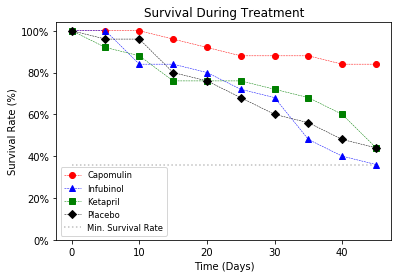

In [14]:
# Generate the Plot (Accounting for percentages)
fig, mice = plt.subplots()
mice.plot(mice_pivot.index,mice_pivot['Capomulin'],marker ='o',linestyle="--",linewidth=0.5,color="red",label="Capomulin")
mice.plot(mice_pivot.index,mice_pivot['Infubinol'],marker ='^',linestyle="--",linewidth=0.5,color="blue",label="Infubinol")
mice.plot(mice_pivot.index,mice_pivot['Ketapril'],marker ='s',linestyle="--",linewidth=0.5,color="green",label="Ketapril")
mice.plot(mice_pivot.index,mice_pivot['Placebo'],marker ='D',linestyle="--",linewidth=0.5,color="black",label="Placebo")

min_survival_rate = mice_pivot["Infubinol"][45]
mice.hlines(min_survival_rate, 0, 45, linestyle=":",alpha=0.25,label="Min. Survival Rate")

mice.set_xlabel("Time (Days)")
mice.set_ylabel("Survival Rate (%)")
mice.legend(loc="best", fontsize="small", fancybox=True)
mice.set_title('Survival During Treatment')

mice.yaxis.set_major_formatter(mtick.PercentFormatter(mice_pivot["Capomulin"][0]))
mice.set_ylim(0,26)

# Save the Figure
plt.savefig("../Images/SurvivalRate.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [15]:
# Calculate the percent changes for each drug
tumor_mean_pivot_summary = tumor_mean_pivot[['Capomulin','Infubinol','Ketapril','Placebo']]
tumor_mean_pivot_summary.reset_index(inplace=True)
drugs = ['Capomulin','Infubinol','Ketapril','Placebo']
pct_change = []
for drug in drugs:
    pct_change.append((((tumor_mean_pivot_summary[drug][9]/tumor_mean_pivot_summary[drug][0])-1))*100)
pct_change_df = pd.DataFrame({'Drug Name':drugs,'Percent Change':pct_change})    
# Display the data to confirm
pct_change_df

,Drug Name,Percent Change
0,Capomulin,-19.475303
1,Infubinol,46.123472
2,Ketapril,57.028795
3,Placebo,51.297960


(-19.475302667894155, 46.12347172785185, 57.02879468660604, 51.29796048315151)


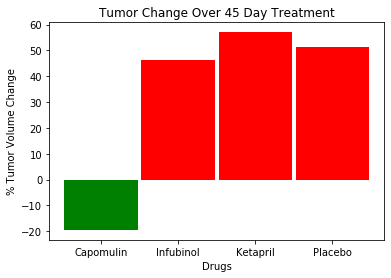

In [16]:
# Store all Relevant Percent Changes into a Tuple
def convert(pct_change_df):
    return tuple(i for i in pct_change_df['Percent Change'])
pct_change_tup=convert(pct_change_df)

def convert(pct_change_df):
    return tuple(i for i in pct_change_df['Drug Name'])
drug_name_tup=convert(pct_change_df)

# percent_change = (pct_change_df['Percent Change'])
# drug_name =(pct_change_df['Drug Name'])
# pct_change_tup = pct_change_df.itertuples(index=False, name=None)


# Splice the data between passing and failing drugs
# passing = (pct_change_df.iloc(0))
# passing_drug = (drug_name[0])
# failing_percent = (percent_change[1],percent_change[2],percent_change[3])
# failing_drug = (drug_name[1],drug_name[2],drug_name[3])
# failing=()
# for i in pct_change_tup:
#     if i<0:
#         passing = i
#     else:
#         failing.add(i)
print(pct_change_tup)
passing= (-19.475302667894155,0,0,0)
failing= (0, 46.12347172785185, 57.02879468660604, 51.29796048315151)


# Orient widths. Add labels, tick marks, etc. 
# fig, change = plt.subplots()
# y_pos_pass = np.arange(0)
# y_pos_fail = np.arange(0,2)
# change.bar(y_pos_fail, failing_percent, align='center', alpha=0.5)
# plt.xticks(y_pos_fail, failing_drug)
# pct_change_tup.plot(kind="bar", facecolor="red")

y_pos = np.arange(len(drug_name_tup))

fig, change = plt.subplots()
plt.bar(y_pos, passing, align='center', color="green",width=.95)
plt.bar(y_pos, failing, align='center', color="red",width=.95,tick_label=failing)

plt.xticks(y_pos, drug_name_tup)

plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.xlabel("Drugs")



# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure

plt.savefig("../Images/SuccessRate.png")

# Show the Figure
fig.show()
